# GRA

Gamma-ray Attenuation

In [2]:
# force Jupyter to autoreload modules when they have been edited
# this helps keep the iodp module current as it is actively developed.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
import os
from importlib import reload

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from iodp import utils



In [4]:
# Ensure we are in the PhysicalProperties root folder
if not os.getcwd().endswith("PhysicalProperties"):
    print("Current working directory:", os.getcwd())
    os.chdir("../")
    
print("New current working directory:", os.getcwd())

Current working directory: d:\archive\hd_files\data_analysis\50_laboratory_notebooks\SOD-Laboratory\PhysicalProperties\notebooks
New current working directory: d:\archive\hd_files\data_analysis\50_laboratory_notebooks\SOD-Laboratory\PhysicalProperties


# Read GRA .GRA files

In [16]:
file = './data/input/GRA/400-U1603A-1H-1_20230824145601.GRA'
df = utils.read_instrument_file(file,as_dataframe=False)
pd.DataFrame(df['MULTI'])

,offset,density_bulk_gra,total_counts_sec,timestamp
0,4.00,1.263,26457,2023-08-24 14:48:33
1,6.00,1.264,26439,2023-08-24 14:48:37
2,8.00,1.336,25580,2023-08-24 14:48:42
3,10.00,1.348,25438,2023-08-24 14:48:46
4,12.00,1.330,25648,2023-08-24 14:48:51
...,...,...,...,...
67,138.00,1.469,24043,2023-08-24 14:55:41
68,140.00,1.446,24299,2023-08-24 14:55:46
69,142.00,1.443,24341,2023-08-24 14:55:51
70,144.00,1.444,24324,2023-08-24 14:55:56


## Read GRA .ini files

In [67]:
file = './data/input/GRA/i_pi_gra.ini'
df = utils.read_instrument_ini(file,as_dataframe=True)
df

,value
key,
mgi rwa section options,2.0.1 %04Y%02m%02d %02H%02M%S%25u*~|.%d*~|....
ims framework-major,14
ims framework-minor,0
plugin-major,0
plugin-minor,0
...,...
background data paths .calibration paths,<0>
background data paths .raw data paths,<0>
density,0.9814619432569


# Exploring GRA

In [27]:
file = './data/input/GRA/400-U1603A-1H-1_20230824145601.GRA'
df = utils.read_instrument_file(file,as_dataframe=True)
df.head()

,datetime,labelid,user,text_id,instrument,instrument_group,observed_length,comment,period,slope,intercept,r_value,core_diameter,calibration_timestamp,config,positions_excluded,offset,density_bulk_gra,total_counts_sec,timestamp
0,2023-08-24 14:56:01 UTC,400-U1603A-1H-1,JR_PINERO,SECT12641451,0) ORTEC MODEL: ORTEC DIGIBASE S/N: 15340,WRMSL,151.60,,3.000,-2.160534,23.264003,0.999791,6.600,2023-08-23 00:27:33,c:\ims\config_wrmsl\i_pi_gra.ini,FALSE,4.00,1.263,26457,2023-08-24 14:48:33
1,2023-08-24 14:56:01 UTC,400-U1603A-1H-1,JR_PINERO,SECT12641451,0) ORTEC MODEL: ORTEC DIGIBASE S/N: 15340,WRMSL,151.60,,3.000,-2.160534,23.264003,0.999791,6.600,2023-08-23 00:27:33,c:\ims\config_wrmsl\i_pi_gra.ini,FALSE,6.00,1.264,26439,2023-08-24 14:48:37
2,2023-08-24 14:56:01 UTC,400-U1603A-1H-1,JR_PINERO,SECT12641451,0) ORTEC MODEL: ORTEC DIGIBASE S/N: 15340,WRMSL,151.60,,3.000,-2.160534,23.264003,0.999791,6.600,2023-08-23 00:27:33,c:\ims\config_wrmsl\i_pi_gra.ini,FALSE,8.00,1.336,25580,2023-08-24 14:48:42
3,2023-08-24 14:56:01 UTC,400-U1603A-1H-1,JR_PINERO,SECT12641451,0) ORTEC MODEL: ORTEC DIGIBASE S/N: 15340,WRMSL,151.60,,3.000,-2.160534,23.264003,0.999791,6.600,2023-08-23 00:27:33,c:\ims\config_wrmsl\i_pi_gra.ini,FALSE,10.00,1.348,25438,2023-08-24 14:48:46
4,2023-08-24 14:56:01 UTC,400-U1603A-1H-1,JR_PINERO,SECT12641451,0) ORTEC MODEL: ORTEC DIGIBASE S/N: 15340,WRMSL,151.60,,3.000,-2.160534,23.264003,0.999791,6.600,2023-08-23 00:27:33,c:\ims\config_wrmsl\i_pi_gra.ini,FALSE,12.00,1.330,25648,2023-08-24 14:48:51


[]

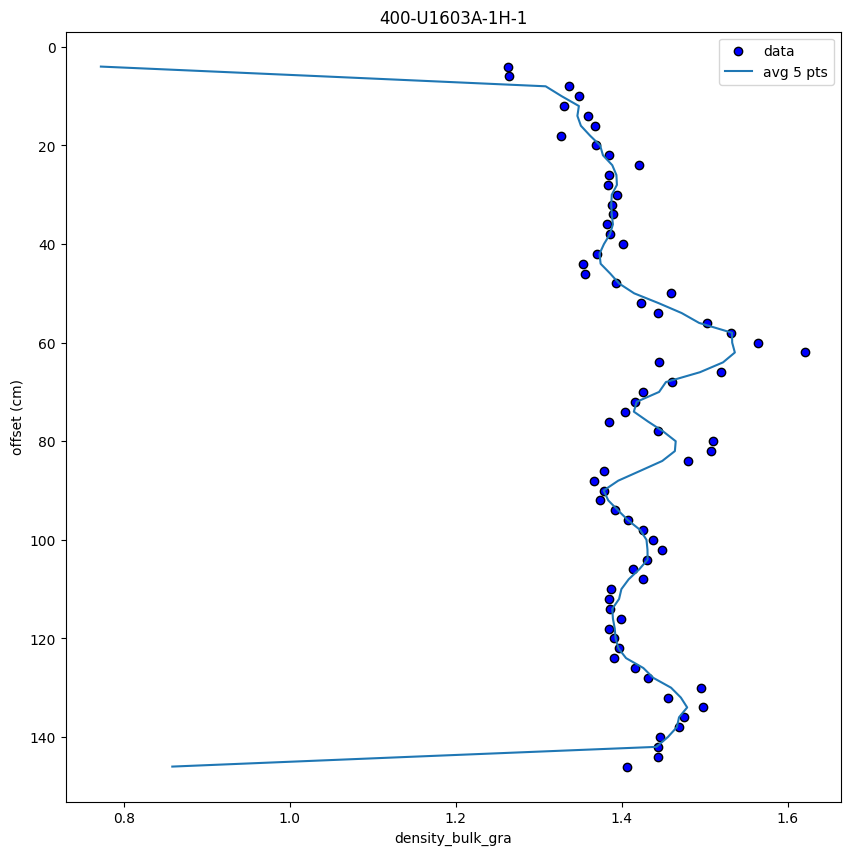

In [63]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

x = df["density_bulk_gra"].astype(float)
y = df['offset'].astype(float)

ax.scatter(
    x=x,
    y=y,
    label='data',
    color='blue',
    edgecolor='black'
)

windowsize = 5
ax.plot(
    utils.convolve(x,windowsize),
    y,
    label=f'avg {windowsize} pts'
)


ax.invert_yaxis()
ax.set_ylabel("offset (cm)")
ax.set_xlabel("density_bulk_gra")
ax.set_title(f"{df['labelid'][0]}")
ax.legend()
plt.plot()

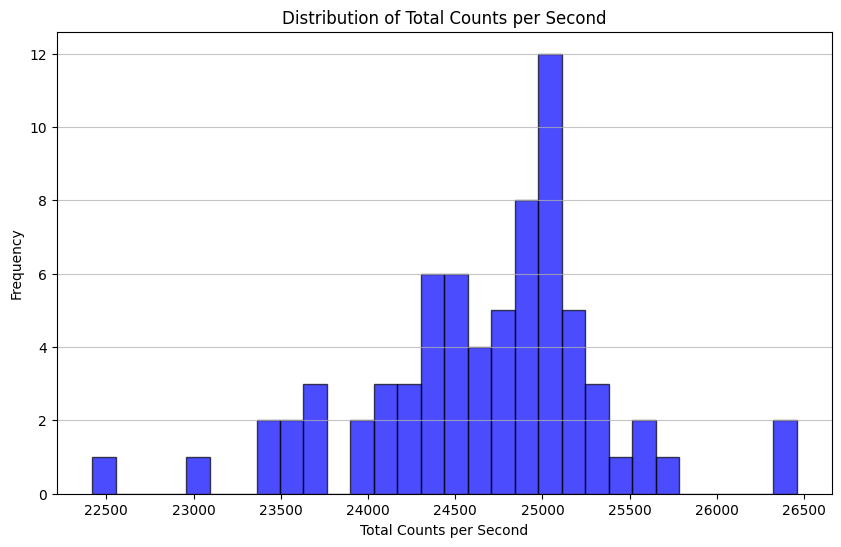

In [62]:
df['total_counts_sec'].astype(int)
plt.figure(figsize=(10, 6))
df['total_counts_sec'].astype(int).plot(kind='hist', bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Total Counts per Second')
plt.xlabel('Total Counts per Second')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

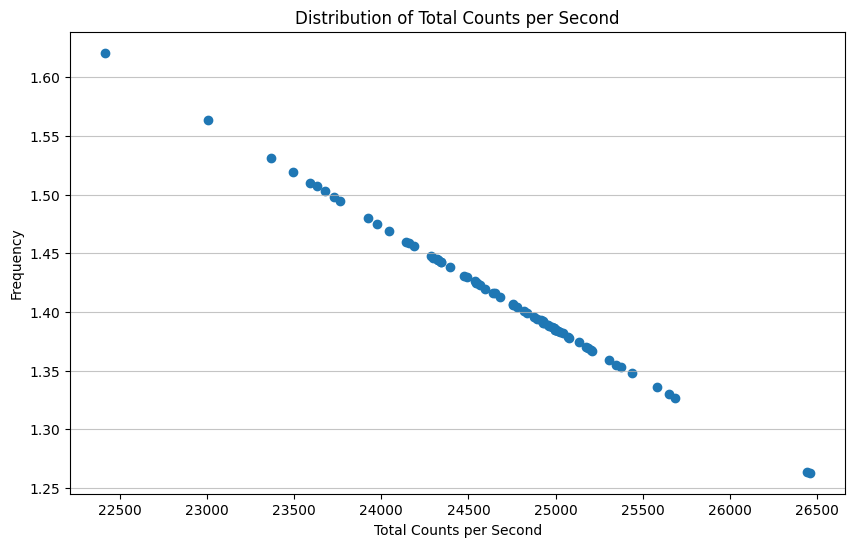

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(x = df['total_counts_sec'].astype(int), y=df['density_bulk_gra'].astype(float))

plt.title('Distribution of Total Counts per Second')
plt.xlabel('Total Counts per Second')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()